In [0]:
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get -y install -qq google-drive-ocamlfuse fuse 

In [1]:
 from google.colab import drive
 drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import shutil
import sys
import time
from google.colab import output
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [0]:
base_path = '/content/drive/My Drive/Dev_ML/Faster-RCNN/'
images_boxable_fname = base_path + 'train-images-boxable.csv'
annotations_bbox_fname = base_path + 'train-annotations-bbox.csv'
class_descriptions_fname = base_path + 'class-descriptions-boxable.csv'

In [4]:
images_boxable = pd.read_csv(images_boxable_fname)
images_boxable.head()

,image_name,image_url
0,e39871fd9fd74f55.jpg,https://requestor-proxy.figure-eight.com/figur...
1,f18b91585c4d3f3e.jpg,https://requestor-proxy.figure-eight.com/figur...
2,ede6e66b2fb59aab.jpg,https://requestor-proxy.figure-eight.com/figur...
3,ed600d57fcee4f94.jpg,https://requestor-proxy.figure-eight.com/figur...
4,ff47e649b23f446d.jpg,https://requestor-proxy.figure-eight.com/figur...


In [5]:
  images_boxable["image_url"].values

array(['https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train/e39871fd9fd74f55.jpg',
       'https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train/f18b91585c4d3f3e.jpg',
       'https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train/ede6e66b2fb59aab.jpg',
       ...,
       'https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train/0cbe670c7e0cebfc.jpg',
       'https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train/0aa947b5ee5940ee.jpg',
       'https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train/02a20d625073c07a.jpg'],
      dtype=object)

In [6]:
annotations_bbox = pd.read_csv(annotations_bbox_fname)
annotations_bbox.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [7]:
class_descriptions = pd.read_csv(class_descriptions_fname, header=None)
class_descriptions.head()

,0,1
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [0]:
def plot_bbox(img_id):
  img_url = images_boxable.loc[images_boxable["image_name"]==img_id + '.jpg']['image_url'].values[0]
  img = io.imread(img_url)
  print(f"Image: {img.shape}")
  try: 
    height, width, channel = img.shape
  except:   
    height, width = img.shape
    channel = 1
  bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
  for index, row in bboxs.iterrows():
      xmin = row['XMin']
      xmax = row['XMax']
      ymin = row['YMin']
      ymax = row['YMax']
      xmin = int(xmin*width)
      xmax = int(xmax*width)
      ymin = int(ymin*height)
      ymax = int(ymax*height)
      label_name = row['LabelName']
      class_series = class_descriptions[class_descriptions[0]==label_name]
      class_name = class_series[1].values[0]
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Boxes')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

In [0]:
least_objects_img_ids = annotations_bbox["ImageID"].value_counts().tail(50).index.values

Image: (1024, 768, 3)
Coordinates: (224, 322), (545, 666)


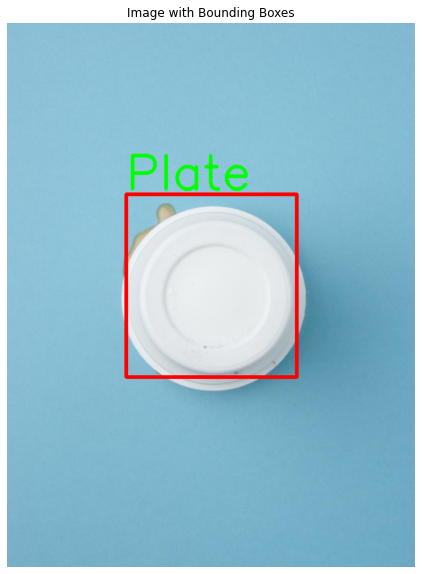

Image: (1024, 689, 3)
Coordinates: (0, 98), (687, 1022)


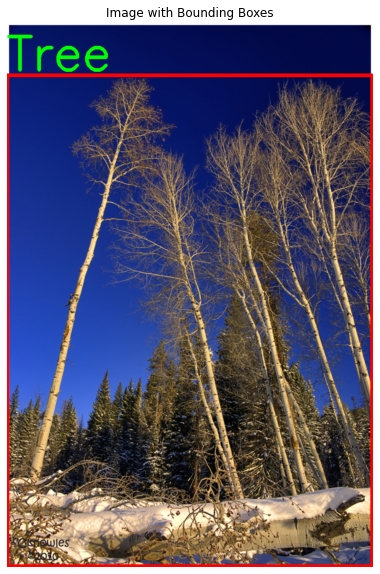

Image: (877, 1024, 3)
Coordinates: (0, 0), (1023, 876)


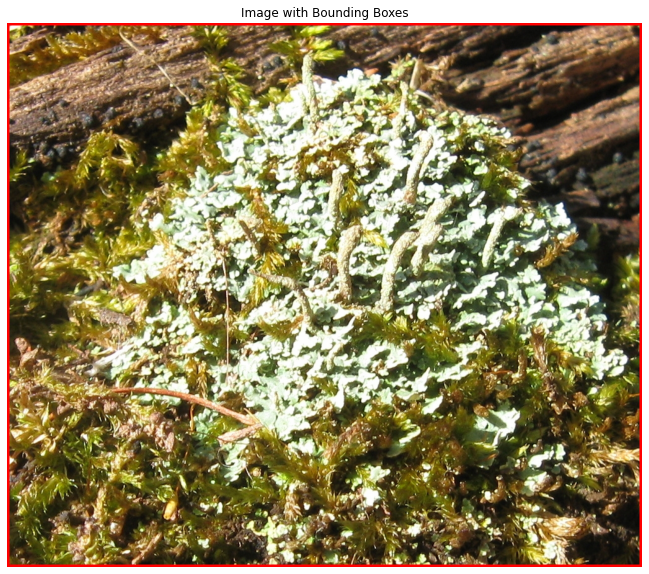

In [32]:
for img_id in random.sample(list(least_objects_img_ids), 3):
  plot_bbox(img_id)

In [11]:
class_descriptions.loc[class_descriptions[1].isin(['Ball', 'Apple', 'Bird', 'Bus', 'Chair'])]

,0,1
13,/m/014j1m,Apple
21,/m/015p6,Bird
37,/m/018xm,Ball
49,/m/01bjv,Bus
96,/m/01mzpv,Chair


In [0]:
# Find the label_name for 'Person', 'Mobile Phone' and 'Car' classes
apple_pd = class_descriptions[class_descriptions[1]=='Apple']
bird_pd = class_descriptions[class_descriptions[1]=='Bird']
ball_pd = class_descriptions[class_descriptions[1]=='Ball']
bus_pd = class_descriptions[class_descriptions[1]=='Bus']
chair_pd = class_descriptions[class_descriptions[1]=='Chair']

label_name_apple = apple_pd[0].values[0]
label_name_bird = bird_pd[0].values[0]
label_name_ball = ball_pd[0].values[0]
label_name_bus = bus_pd[0].values[0]
label_name_chair = chair_pd[0].values[0]

In [13]:
label_name_chair

'/m/01mzpv'

In [0]:
apple_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_apple]
bird_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_bird]
ball_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_ball]
bus_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_bus]
chair_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_chair]

In [0]:
apple_img_id = apple_bbox['ImageID']
bird_img_id = bird_bbox['ImageID']
ball_img_id = ball_bbox['ImageID']
bus_img_id = bus_bbox['ImageID']
chair_img_id = chair_bbox['ImageID']

In [0]:
n = 800
subapple_img_id = random.sample(list(apple_img_id), n)
subbird_img_id = random.sample(list(bird_img_id), n)
subball_img_id = random.sample(list(ball_img_id), n)
subbus_img_id = random.sample(list(bus_img_id), n)
subchair_img_id = random.sample(list(chair_img_id), n)

In [0]:
subapple_pd = images_boxable.loc[images_boxable['image_name'].isin(x + '.jpg' for x in subapple_img_id)]
subbird_pd = images_boxable.loc[images_boxable['image_name'].isin(x + '.jpg' for x in subbird_img_id)]
subball_pd = images_boxable.loc[images_boxable['image_name'].isin(x + '.jpg' for x in subball_img_id)]
subbus_pd = images_boxable.loc[images_boxable['image_name'].isin(x + '.jpg' for x in subbus_img_id)]
subchair_pd = images_boxable.loc[images_boxable['image_name'].isin(x + '.jpg' for x in subchair_img_id)]

In [18]:
subapple_pd.head()

,image_name,image_url
718,fcdcdfa19ed6046e.jpg,https://requestor-proxy.figure-eight.com/figur...
6196,e554ad3a839e9f77.jpg,https://requestor-proxy.figure-eight.com/figur...
19078,f95636b75d489920.jpg,https://requestor-proxy.figure-eight.com/figur...
19598,f60db37889e02bd8.jpg,https://requestor-proxy.figure-eight.com/figur...
19903,e57971695af089a7.jpg,https://requestor-proxy.figure-eight.com/figur...


In [0]:
subapple_dict = subapple_pd[["image_name", "image_url"]].set_index('image_name')["image_url"].to_dict()
subbird_dict = subbird_pd[["image_name", "image_url"]].set_index('image_name')["image_url"].to_dict()
subball_dict = subball_pd[["image_name", "image_url"]].set_index('image_name')["image_url"].to_dict()
subbus_dict = subbus_pd[["image_name", "image_url"]].set_index('image_name')["image_url"].to_dict()
subchair_dict = subchair_pd[["image_name", "image_url"]].set_index('image_name')["image_url"].to_dict()

In [33]:
mappings = [subapple_dict, subbird_dict, subball_dict,subbus_dict, subchair_dict]
print(len(mappings), len(mappings[1]))

5 694


In [25]:
len(mappings[1])

1

In [34]:
total_imgs_count = 0
for i in range(len(mappings)):
  total_imgs_count += len(mappings[i])
  print(len(mappings[i]))
total_imgs_count

452
694
647
770
771


3334

In [0]:
classes = ['Apple', 'Bird', 'Ball', 'Bus', 'Chair']

In [0]:
# dowload images
for idx, obj_type in enumerate(classes):
  print('dowloading images for class', obj_type)
  if (obj_type in ['Bus', 'Chair']):
    n_issues = 0
    # create the directory
    if not os.path.exists(obj_type):
      os.mkdir(obj_type)
    for img_id, url in mappings[idx].items():
      try:
        img = io.imread(url)
        saved_path = os.path.join(obj_type, img_id)
        io.imsave(saved_path, img)
      except Exception as e:
        n_issues += 1
    print(f"Images Issues: {n_issues}")

In [0]:
!ls Ball | wc -l

ls: cannot access 'Ball': No such file or directory
0


In [0]:
!ls Bus | wc -l

In [0]:
# save images to train and test directory
train_path = 'train'
test_path = 'test'

In [0]:
!mkdir train test

In [0]:
total_train_imgs = 0
total_test_imgs = 0

In [0]:

for i in range(len(classes)):
    all_imgs = os.listdir(classes[i])
    all_imgs = [f for f in all_imgs if not f.startswith('.')]
    random.shuffle(all_imgs)
    limit = int(len(all_imgs)*0.8)

    train_imgs = all_imgs[:limit]
    test_imgs = all_imgs[limit:]

    print(limit, classes[i], len(all_imgs), len(train_imgs), len(test_imgs))

    # copy each classes' images to train directory
    for j in range(len(train_imgs)):
        original_train_path = os.path.join(classes[i], train_imgs[j])
        new_train_path = os.path.join(train_path, train_imgs[j])
        copyfile(original_train_path, new_train_path)
        total_train_imgs += 1
        
    # copy each classes' images to test directory
    for j in range(len(test_imgs)):
        original_path = os.path.join(classes[i], test_imgs[j])
        new_path = os.path.join(test_path, test_imgs[j])
        copyfile(original_path, new_path)
        total_test_imgs += 1

In [0]:
print(total_train_imgs, total_test_imgs)

In [0]:
!ls train | wc -l
!ls test | wc -l

In [0]:
label_names = [label_name_apple, label_name_bird, label_name_bus, label_name_ball, label_name_chair]

train_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
train_imgs = os.listdir(train_path)
train_imgs = [name for name in train_imgs if not name.startswith('.')]

for i in range(len(train_imgs)):
    sys.stdout.write('Parse train_imgs ' + str(i) + '; Number of boxes: ' + str(len(train_df)) + '\r')
    sys.stdout.flush()
    img_name = train_imgs[i]
    img_id = img_name[0:16]
    output.clear()
    print('Process image:', img_id, 'Index:', i)
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for i in range(len(label_names)):
            if labelName == label_names[i]:
                train_df = train_df.append({'FileName': img_name, 
                                            'XMin': row['XMin'], 
                                            'XMax': row['XMax'], 
                                            'YMin': row['YMin'], 
                                            'YMax': row['YMax'], 
                                            'ClassName': classes[i]}, 
                                           ignore_index=True)

# New Section

In [0]:
train_df.head()

In [0]:
train_df.shape

In [0]:
test_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# find boxes in each image and put them in a dataframe
test_imgs = os.listdir(test_path)
test_imgs = [name for name in test_imgs if not name.startswith('.')]

for i in range(len(test_imgs)):
    sys.stdout.write('Parse test_imgs ' + str(i) + '; Number of boxes: ' + str(len(test_df)) + '\r')
    sys.stdout.flush()
    img_name = test_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for i in range(len(label_names)):
            if labelName == label_names[i]:
                test_df = test_df.append({'FileName': img_name, 
                                            'XMin': row['XMin'], 
                                            'XMax': row['XMax'], 
                                            'YMin': row['YMin'], 
                                            'YMax': row['YMax'], 
                                            'ClassName': classes[i]}, 
                                           ignore_index=True)

In [0]:
test_df.shape

In [0]:
base_dataset_path = 'drive/My Drive/Dev_ML/Faster-RCNN/Dataset/Open Images Dataset V4/5 Classes'

In [0]:
train_df.to_csv('train.csv')
test_df.to_csv('test.csv')

In [0]:
train_df = pd.read_csv('train.csv')

# for train dataset
with open("annotation_v4.txt", "w+") as f:
  for idx, row in train_df.iterrows():
      img = cv2.imread('train/' + row['FileName'])
      height, width = img.shape[:2]
      x1 = int(row['XMin'] * width)
      x2 = int(row['XMax'] * width)
      y1 = int(row['YMin'] * height)
      y2 = int(row['YMax'] * height)
      
      google_colab_file_path = os.path.join(base_dataset_path, 'train')
      fileName = os.path.join(google_colab_file_path, row['FileName'])
      className = row['ClassName']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')

In [0]:
test_df = pd.read_csv('test.csv')

# for test dataset
with open("test_annotation_v4.txt", "w+") as f:
  for idx, row in test_df.iterrows():
      sys.stdout.write(str(idx) + '\r')
      sys.stdout.flush()
      img = cv2.imread('test/' + row['FileName'])
      height, width = img.shape[:2]
      x1 = int(row['XMin'] * width)
      x2 = int(row['XMax'] * width)
      y1 = int(row['YMin'] * height)
      y2 = int(row['YMax'] * height)
      
      google_colab_file_path = os.path.join(base_dataset_path, 'test')
      fileName = os.path.join(google_colab_file_path, row['FileName'])
      className = row['ClassName']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')

In [0]:
!mv test 'drive/My Drive/Dev_ML/Faster-RCNN/Dataset/Open Images Dataset V4/5 Classes/'
!mv train 'drive/My Drive/Dev_ML/Faster-RCNN/Dataset/Open Images Dataset V4/5 Classes/'

In [0]:
copyfile('annotation_v4.txt', base_dataset_path + '/train/train_annotation.txt')
copyfile('test_annotation_v4.txt', base_dataset_path + '/test/test_annotation.txt')

In [0]:
!ls